# Proyek Analisis Data: [Air-quality-dataset]
- **Nama:** Rafli Nur Rahman
- **Email:** raflitbl1724@gmail.com
- **ID Dicoding:** rapurikalanikov

## Question 

- Which station has contributed the largest CO2 gas in the last 3 years
- How did PM2.5 or PM10 concentrations change from 2013 to 2017?
- What time or month are PM2.5 concentrations highest or lowest?

## Import importan library

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [11]:
Aotizhongxin = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Aotizhongxin.csv')
Changping = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Changping.csv')
Dingling = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Dingling.csv')
Dongsi = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Dongsi.csv')
Guanyuan = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Guanyuan.csv')
Gucheng = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Gucheng.csv')
Huairou = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Huairou.csv')
Nongzhanguan = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Nongzhanguan.csv')
Shunyi = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Shunyi.csv')
Tiantan = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Tiantan.csv')
Wanliu = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Wanliu.csv')
Wanshouxigong = pd.read_csv('data/Air-quality-dataset/PRSA_Data_20130301-20170228/Wanshouxigong.csv')

### Merge Data Set

In [12]:
dataframe_test = [Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong]
combine = pd.concat(dataframe_test)
combine = combine.reset_index(drop=True)

combine.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

#### Evaluate tabel `combine`

In [13]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [14]:
combine.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [15]:
print("Duplicate Count: ", combine.duplicated().sum())

Duplicate Count:  0


In [16]:
combine.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


# Cleaning and Preparing Data
Handle missing values, correct data types, and remove duplicates.

In [17]:
combine['timestamp'] = pd.to_datetime(combine[['year', 'month', 'day', 'hour']])
combine.set_index('timestamp', inplace=True)

In [18]:
combine.interpolate(method='time', inplace=True)
combine.describe()

/tmp/ipykernel_10430/1474856303.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combine.interpolate(method='time', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.845740,104.872067,15.883456,50.610389,1233.454288,57.023507,13.531984,1010.754627,2.482653,0.064417,1.729950
std,10122.116943,1.177198,3.448707,8.800102,6.922195,81.012438,92.560886,21.754781,35.158710,1166.042001,56.613598,11.437625,10.474920,13.797004,0.820626,1.246562
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,146.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [19]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [20]:
combine['wd'] = combine['wd'].fillna(combine['wd'].mode()[0])  

In [21]:
combine.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [22]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [23]:
last_3Years = combine[combine['year'] >= 2015]
Co_3Years = last_3Years.groupby('station')['CO'].sum().reset_index()
max_Co = Co_3Years[Co_3Years['CO'] == Co_3Years['CO'].max()]
print(max_Co)

        station          CO
0  Aotizhongxin  25288650.0


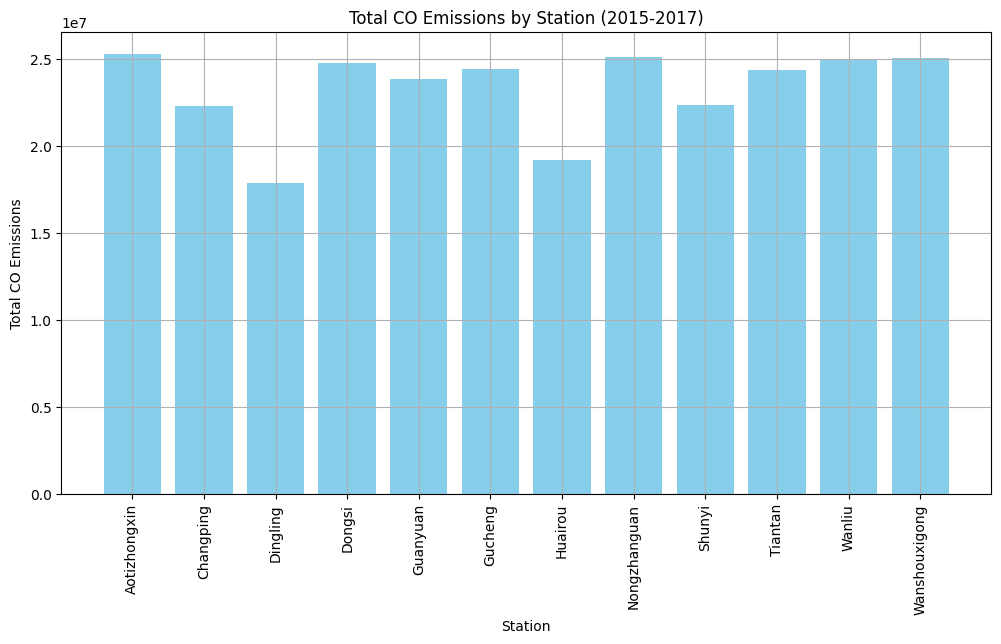

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(Co_3Years['station'], Co_3Years['CO'], color='skyblue')
plt.title('Total CO Emissions by Station (2015-2017)')
plt.xlabel('Station')
plt.ylabel('Total CO Emissions')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Explanation:
According by graf from above, we know stations aotizhongxin spend highest Co2 Emission from start 2015 to 2017 with highest point is **25288650** µg/m³.

Station with lowest spend Co2 Emission it is from Dingling Station with point **1.8**


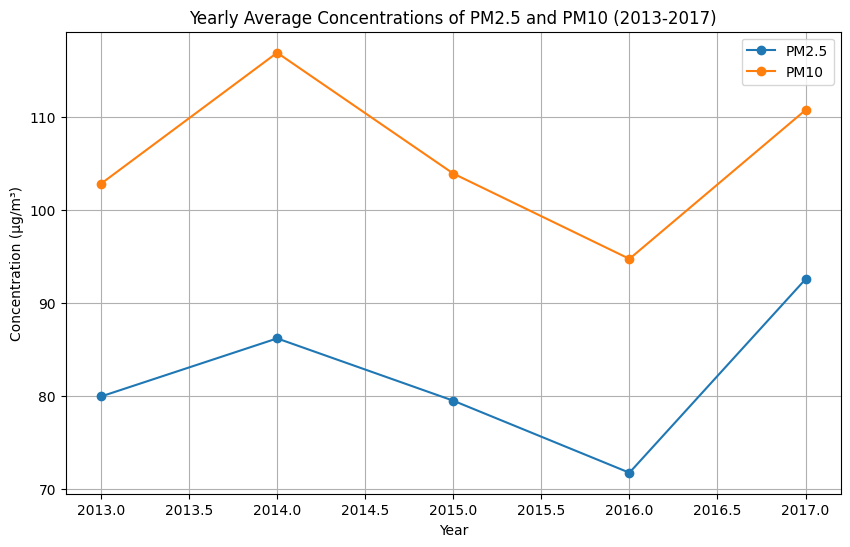

In [25]:
avg_pm = combine.groupby('year')[['PM2.5', 'PM10']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_pm['year'], avg_pm['PM2.5'], label='PM2.5', marker='o')
plt.plot(avg_pm['year'], avg_pm['PM10'], label='PM10', marker='o')
plt.title('Yearly Average Concentrations of PM2.5 and PM10 (2013-2017)')
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

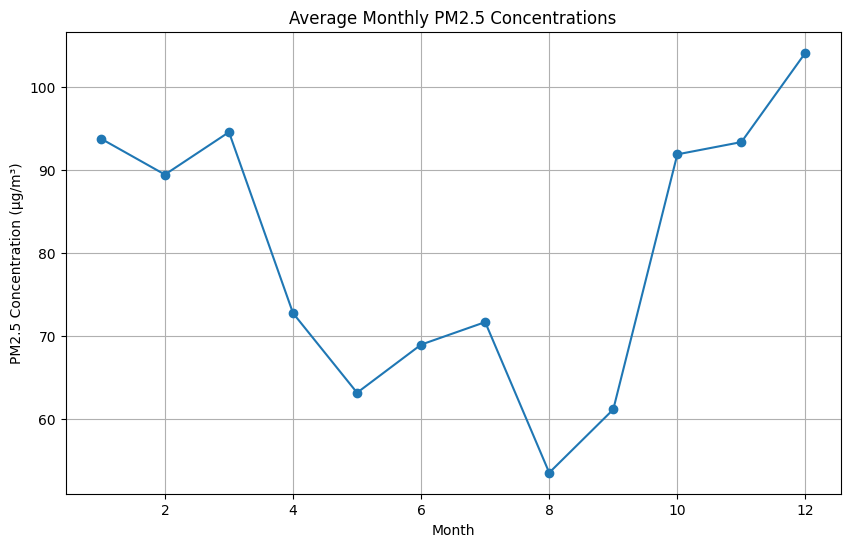

In [26]:
combine['month_year'] = pd.to_datetime(combine[['year', 'month']].assign(day=1))
month_avg_pm25 = combine.groupby('month')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(month_avg_pm25['month'], month_avg_pm25['PM2.5'], marker='o')
plt.title('Average Monthly PM2.5 Concentrations')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.show()

In [27]:
highest_PM25_month = month_avg_pm25[month_avg_pm25['PM2.5'] == month_avg_pm25['PM2.5'].max()]
lowest_PM25_month = month_avg_pm25[month_avg_pm25['PM2.5'] == month_avg_pm25['PM2.5'].min()]
print(f'Highest PM2.5 concentration in month: {highest_PM25_month["month"].values[0]}')
print(f'Lowest PM2.5 concentration in month: {lowest_PM25_month["month"].values[0]}')

Highest PM2.5 concentration in month: 12
Lowest PM2.5 concentration in month: 8


In [28]:
numeric_filter = combine.select_dtypes(include=np.number)
correlation = numeric_filter.corr()
print("\nkorelasi:\n",correlation)


korelasi:
              No          year         month           day          hour  \
No     1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year   0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03 -2.115260e-15   
month  0.043181 -2.020099e-01  1.000000e+00  1.052232e-02 -1.905981e-16   
day    0.017764 -5.569082e-03  1.052232e-02  1.000000e+00  1.013388e-17   
hour   0.000684 -2.115260e-15 -1.905981e-16  1.013388e-17  1.000000e+00   
PM2.5 -0.025877 -2.751970e-02  7.783219e-03  5.944607e-03  1.093693e-02   
PM10  -0.045681 -3.848373e-02 -2.836298e-02  2.822893e-02  5.005734e-02   
SO2   -0.227053 -1.706500e-01 -2.142261e-01 -8.741881e-04  2.906994e-02   
NO2   -0.048460 -5.751562e-02  3.889589e-02  1.513116e-02 -2.836102e-03   
CO     0.020213  8.411062e-03  4.700254e-02 -1.558406e-02 -3.254749e-02   
O3    -0.040510 -1.355127e-02 -1.062729e-01  2.242981e-03  2.833231e-01   
TEMP  -0.122641 -1.522787e-01  1.324827e-01  1.423337e-02  1.421705e-01   
PRES   0.1886

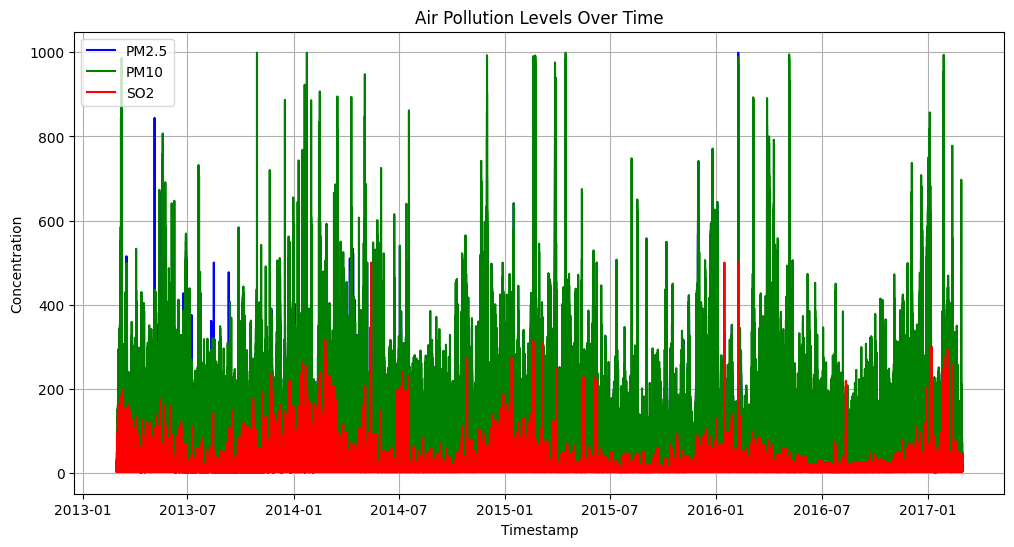

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(combine.index, combine['PM2.5'], label='PM2.5', color='blue')
plt.plot(combine.index, combine['PM10'], label='PM10', color='green')
plt.plot(combine.index, combine['SO2'], label='SO2', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Concentration')
plt.title('Air Pollution Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Highest Emission:
- The pollutant with the highest emission over the period is **PM10**, with a total emission value of approximately **44,126,809**.
- PM10 represents particulate matter with a diameter of 10 micrometers or less, typically generated by dust, combustion, and industrial processes.

### Lowest Emission:
- The pollutant with the lowest emission is **SO2** (Sulfur Dioxide), with a total emission value of around **6,683,249**.
- SO2 is primarily produced by the burning of fossil fuels and can lead to acid rain, contributing to environmental and health hazards.

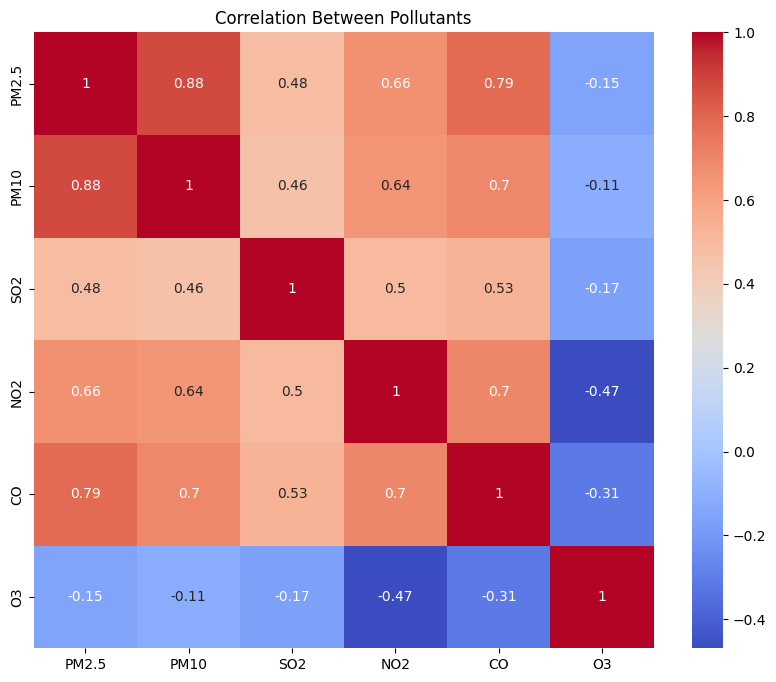

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(combine[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants')
plt.show()

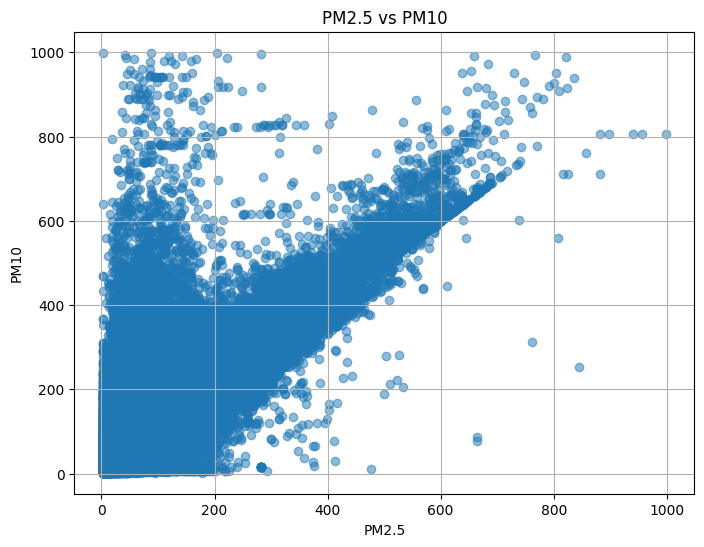

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(combine['PM2.5'], combine['PM10'], alpha=0.5)
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('PM2.5 vs PM10')
plt.grid(True)
plt.show()
